<a href="https://colab.research.google.com/github/MehrnazSadeghieh/Computational-Intelligence-ThirdProject/blob/main/Copmputer_Intelligence_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copmputer Intelligence project

### Faridreza Momtaz Zandi 9812762601
### Mehrnaz Sadeghieh 9812762167


After dealing with feature engineering in the previous phases and getting to know classifiers and clustering methods we are now finally reached the stage to use all our knowledge and get to use what we learned on a real-life dataset and try to find the solution to a well-known problem. Up till now we had a pretty neat dataset and didn't need to do anything about it to make it ready but in this project, one of our main objectives is to load and tidy our data so we can extract features and use it to train and predict a CNN model. We finish our work by analysing how our model works on our data and try to improve it by using various ways to make our model more accurate.

We simply start by linking our drive to our notebook so we don't need to upload every time we need to use our dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pyEDFlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.9 MB/s eta 0:00:00


Like always we import all the needed libraries which we're gonna use.

In [ ]:
import pyedflib
import numpy as np
from scipy.signal import butter, lfilter
import tensorflow as tf
import scipy.stats as sp
from tensorflow.keras import datasets, layers, models, Input
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, accuracy_score, confusion_matrix, recall_score, precision_score

As we did in previous phases we need to give the seed to our environment.

In [ ]:
seed = 57
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

## Part 1: loading data and making it ready
In this part, we're gonna use 11 signals and only 10 of them are containing 1 seizure part. We got these data set from "physionet.org/content/chbmit/1.0.0" and use its summary text file to find seizure parts. We try to use a 10-second window on these signals and use overlapped windows to get 10 times more samples! Out of 3000 samples, 600 of them contain a seizure part and 2400 are normals and 25% of our normals are from signals that had seizure parts.

In [ ]:
seizurs = []
normals = []
pred_test = []

In [ ]:
file_name = "/content/drive/MyDrive/dataset/chb01_03.edf"
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
new_sigbufs = sigbufs[16:18, :]
for i in range (0,40):
      seizurs.append(new_sigbufs[:, (i+2995)*256:(i+2995)*256 + 2560])

for i in range (0,60):
    normals.append(new_sigbufs[:, (i+360)*256:(i+360)*256 + 2560])

In [ ]:
file_name = "/content/drive/MyDrive/dataset/chb01_04.edf"
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
new_sigbufs = sigbufs[16:18, :]
for i in range (0,20):
      seizurs.append(new_sigbufs[:, (i+1466)*256:(i+1466)*256 + 2560])

for i in range (0,60):
    normals.append(new_sigbufs[:, (i+360)*256:(i+360)*256 + 2560])

In [ ]:
file_name = "/content/drive/MyDrive/dataset/chb01_15.edf"
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
new_sigbufs = sigbufs[16:18, :]
for i in range (0,40):
      seizurs.append(new_sigbufs[:, (i+1731)*256:(i+1731)*256 + 2560])

for i in range (0,60):
    normals.append(new_sigbufs[:, (i+360)*256:(i+360)*256 + 2560])

In [ ]:
file_name = "/content/drive/MyDrive/dataset/chb01_16.edf"
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
new_sigbufs = sigbufs[16:18, :]
for i in range (0,50):
      seizurs.append(new_sigbufs[:, (i+1014)*256:(i+1014)*256 + 2560])

for i in range (0,60):
    normals.append(new_sigbufs[:, (i+360)*256:(i+360)*256 + 2560])

In [ ]:
file_name = "/content/drive/MyDrive/dataset/chb01_18.edf"
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
new_sigbufs = sigbufs[16:18, :]
for i in range (0,90):
      seizurs.append(new_sigbufs[:, (i+1719)*256:(i+1719)*256 + 2560])

for i in range (0,60):
    normals.append(new_sigbufs[:, (i+360)*256:(i+360)*256 + 2560])

In [ ]:
file_name = "/content/drive/MyDrive/dataset/chb01_21.edf"
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
new_sigbufs = sigbufs[16:18, :]
for i in range (0,90):
      seizurs.append(new_sigbufs[:, (i+326)*256:(i+326)*256 + 2560])

for i in range (0,60):
    normals.append(new_sigbufs[:, (i+420)*256:(i+420)*256 + 2560])

In [ ]:
file_name = "/content/drive/MyDrive/dataset/chb01_26.edf"
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
new_sigbufs = sigbufs[16:18, :]
for i in range (0,100):
      seizurs.append(new_sigbufs[:, (i+1861)*256:(i+1861)*256 + 2560])

for i in range (0,60):
    normals.append(new_sigbufs[:, (i+360)*256:(i+360)*256 + 2560])

In [ ]:
file_name = "/content/drive/MyDrive/dataset/chb02_16.edf"
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
new_sigbufs = sigbufs[16:18, :]
for i in range (0,80):
      seizurs.append(new_sigbufs[:, (i+129)*256:(i+129)*256 + 2560])

for i in range (0,60):
    normals.append(new_sigbufs[:, (i+360)*256:(i+360)*256 + 2560])

In [ ]:
file_name = "/content/drive/MyDrive/dataset/chb02_16+.edf"
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
new_sigbufs = sigbufs[16:18, :]
for i in range (0,80):
      seizurs.append(new_sigbufs[:, (i+2971)*256:(i+2971)*256 + 2560])

for i in range (0,60):
    normals.append(new_sigbufs[:, (i+360)*256:(i+360)*256 + 2560])

In [ ]:
file_name = "/content/drive/MyDrive/dataset/chb02_19.edf"
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
new_sigbufs = sigbufs[16:18, :]
for i in range (0,10):
      seizurs.append(new_sigbufs[:, (i+3368)*256:(i+3368)*256 + 2560])

for i in range (0,60):
    normals.append(new_sigbufs[:, (i+360)*256:(i+360)*256 + 2560])

In [ ]:
file_name = "/content/drive/MyDrive/dataset/chb01_01.edf"
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
new_sigbufs = sigbufs[16:18, :]
for i in range (0,1800):
    normals.append(new_sigbufs[:, (i+360)*256:(i+360)*256 + 2560])

for i in range (0,600):
    pred_test.append(new_sigbufs[:, (i+2160)*256:(i+2160)*256 + 2560])

Let's check if we choose the right amount of samples:

In [ ]:
print(len(seizurs))
print(len(normals))

600
2400


The last objective of this part is to filter our gained samples by the sampling frequency we got from our source.

In [ ]:
x_normal = np.asarray(normals)
x_seizure = np.asarray(seizurs)

sampling_freq = 256

b, a = butter(3, [0.5,40], btype='bandpass',fs=sampling_freq)


x_normal_filtered = np.array([lfilter(b,a,x_normal[ind,:]) for ind in range(x_normal.shape[0])])
x_seizure_filtered = np.array([lfilter(b,a,x_seizure[ind,:]) for ind in range(x_seizure.shape[0])])

x_normal = x_normal_filtered
x_seizure = x_seizure_filtered

We Finish this part by concatenating our filtered normals and seizures and also make a numpy array with the same size and value of 0 for normals and 1 for seizures so we can use it as a label array.

In [ ]:
x = np.concatenate((x_normal,x_seizure))
y = np.concatenate((np.zeros((2400,1)), np.full((600,1), 1)))

## Part2: Classification
we need to use our achieved dataset to train and test our structured CNN model. We also need to get the features we found are most useful in phase2 and give them to our network as the second input. We start this part by getting our selected features.

Let's have a normalize function so we can call it to normalize each of our features.

In [ ]:
def normalize (x):
    normalizedData = (x-np.min(x))/(np.max(x)-np.min(x))
    return normalizedData

Now we can get all of the selected features and we need to be careful because our data has 2 channels and we need to get the features for both of them.

In [ ]:
margin_factor_values = np.zeros((3000,2,1))
B_factor_values = np.zeros((3000,2,1))
kurtosis_values = np.zeros((3000,2,1))
mean_values = np.zeros((3000,2,1))
median_values = np.zeros((3000,2,1))

abs_max_values = np.zeros((3000,2,1))
variance_values = np.zeros((3000,2,1))
crest_factor_margin_values = np.zeros((3000,2,1))
standard_deviation_values = np.zeros((3000,2,1))
RMS_values = np.zeros((3000,2,1))

for i in range(0 , 3000):
    abs_max_values[i][0][0] = max(x[i][0])
    abs_max_values[i][1][0] = max(x[i][1])
    mean_values[i][0][0] = np.mean(x[i][0])
    mean_values[i][1][0] = np.mean(x[i][1])
    median_values[i][0][0] = np.median(x[i][0])
    median_values[i][1][0] = np.median(x[i][1])
    variance_values[i][0][0] = np.var(x[i][0])
    variance_values[i][1][0] = np.var(x[i][1])
    standard_deviation_values[i][0][0] = np.std(x[i][0])
    standard_deviation_values[i][1][0] = np.std(x[i][0])
    kurtosis_values[i][0][0] = sp.kurtosis(x[i][0])
    kurtosis_values[i][1][0] = sp.kurtosis(x[i][1])
    RMS_values[i][0][0] = np.sqrt(np.mean(x[i][0] ** 2))
    RMS_values[i][1][0] = np.sqrt(np.mean(x[i][1] ** 2))

for i in range (0, 3000):
    crest_factor_margin_values[i][0][0] = abs_max_values[i][0][0] / RMS_values[i][0][0]
    crest_factor_margin_values[i][1][0] = abs_max_values[i][1][0] / RMS_values[i][1][0]
    margin_factor_values[i][0][0] = abs_max_values[i][0][0] / variance_values[i][0][0]
    margin_factor_values[i][1][0] = abs_max_values[i][1][0] / variance_values[i][1][0]
    B_factor_values[i][0][0] = (kurtosis_values[i][0][0] * crest_factor_margin_values[i][0][0]) / standard_deviation_values[i][0][0]
    B_factor_values[i][1][0] = (kurtosis_values[i][1][0] * crest_factor_margin_values[i][1][0]) / standard_deviation_values[i][1][0]

abs_max_values = normalize(abs_max_values)
mean_values = normalize(mean_values)
median_values = normalize(median_values)
variance_values = normalize(variance_values)
standard_deviation_values = normalize(standard_deviation_values)
kurtosis_values = normalize(kurtosis_values)
RMS_values = normalize(RMS_values)
crest_factor_margin_values = normalize(crest_factor_margin_values)
margin_factor_values = normalize(margin_factor_values)
B_factor_values = normalize(B_factor_values)

Our desired features are now concatenated to make our features array.

In [ ]:
x_features = np.concatenate((margin_factor_values, kurtosis_values, median_values, B_factor_values, abs_max_values), 1)

We reached the most complicated part of this project which is designing the best CNN model with no other changes that can't make the result better! First of all, we need to specify that we have two inputs with different shapes one of them is our signals and it goes through 3 convolution layers and 1 pooling, our second input is features that go through a size 1 pooling layer so we get it as tensors and after modeling both inputs we concatenate both layers and give it to a 2 node fully connected layer with softmax as activation.

In [ ]:
inputA = Input(shape=(2,2560))
inputB = Input(shape=(1,10))

x1 = layers.Conv1D(64, 1, activation='relu')(inputA)
x1 = layers.MaxPooling1D(pool_size=2)(x1)
x1 = layers.Conv1D(128, 1, activation='relu')(x1)
x1 = layers.Conv1D(128, 1, activation='relu')(x1)
x1 = layers.Dense(10, activation='relu')(x1)
x1 = tf.keras.Model(inputs=inputA, outputs=x1)

y1 = layers.MaxPooling1D(pool_size=1)(inputB)
y1 = tf.keras.Model(inputs=inputB, outputs=y1)

combined = tf.keras.layers.concatenate([x1.output, y1.output])

z = layers.Dense(2,activation = tf.keras.activations.softmax)(combined)

model = tf.keras.Model(inputs=[x1.input, y1.input], outputs=z)

Let's get a summary of our model so we can see how each layer affect our input.

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 2560)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2, 64)        163904      ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 1, 64)        0           ['conv1d[0][0]']                 
                                                                                                  
 conv1d_1 (Conv1D)              (None, 1, 128)       8320        ['max_pooling1d[0][0]']          
                                                                                            

We also need to compile this model before we can fit or predict with it!

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
x_features = np.transpose(x_features, (0, 2, 1))

We finally reached the point to give our data to our model so we need to call train test split so it can give us a totally random train and test data. we use this method on our x, y and x_features arrays and get their equivelant test and train arrays and give it to our model fit function.

In [ ]:
x_train, x_test, y_train, y_test,x_features_train,x_features_test = train_test_split(x,y,x_features,random_state=seed,test_size=0.2)

history = model.fit([x_train, x_features_train],y_train, batch_size=2400, epochs=20, validation_data=([x_test, x_features_test], y_test))

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 2s 2s/step - loss: 13.5568 - accuracy: 0.7329 - val_loss: 14.5320 - val_accuracy: 0.3100
Epoch 2/20
1/1 [==============================] - 0s 185ms/step - loss: 12.9387 - accuracy: 0.3162 - val_loss: 9.8320 - val_accuracy: 0.3783
Epoch 3/20
1/1 [==============================] - 0s 218ms/step - loss: 6.2783 - accuracy: 0.4625 - val_loss: 7.0175 - val_accuracy: 0.6067
Epoch 4/20
1/1 [==============================] - 0s 252ms/step - loss: 2.0162 - accuracy: 0.7604 - val_loss: 9.3364 - val_accuracy: 0.7367
Epoch 5/20
1/1 [==============================] - 0s 189ms/step - loss: 2.6023 - accuracy: 0.8492 - val_loss: 9.8911 - val_accuracy: 0.7533
Epoch 6/20
1/1 [==============================] - 0s 195ms/step - loss: 2.2000 - accuracy: 0.8621 - val_loss: 8.4222 - val_accuracy: 0.7350
Epoch 7/20
1/1 [==============================] - 0s 189ms/step - loss: 0.9243 - accuracy: 0.9108 - val_loss: 6.9613 - val_accuracy: 0.7133
Epoch 8/20
1/1 [===============

## Part3: Presenting Results
Now that we have our model and used our samples to train it we can use accuracy and validation accuracy to plot both of them and check to see if our model is overfitted or not which we see it's not. We can also use the model evaluates function to get test_loss and test_acc attributes.

19/19 - 0s - loss: 6.0080 - accuracy: 0.7383 - 73ms/epoch - 4ms/step


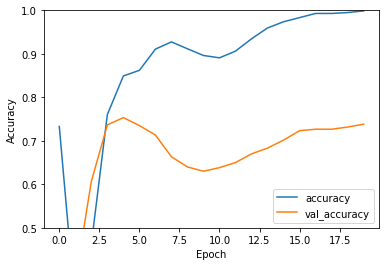

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate([x_test, x_features_test],  y_test, verbose=2)


In [ ]:
test_acc

0.7383333444595337

We need to get the prediction of our model on our test data as the code below does.

In [ ]:
y_pred = model.predict([x_test, x_features_test])

19/19 [==============================] - 0s 2ms/step


As We have a categorical cross-entropy classifier,first we need to convert it to a binary classifier, then we calculate some numerical metrics such as accuracy_score,confusion_matrix,recall_score and precision_score and ROC graph
As mentioned in the class, to have better accuracy we try to look into our samples 5 by 5 so we calculate the number of seizures in larger scope and make the label equal to the most number of types.


0.7383333333333333
[[415  59]
 [ 98  28]]
0.2222222222222222
0.3218390804597701


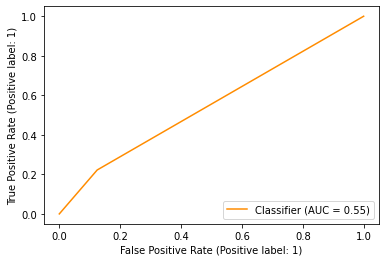

In [ ]:
y_pred_1 = np.zeros((600,1))

for i in range(0,600):
  if(y_pred[i][0][0] > y_pred[i][0][1]):
    y_pred_1[i][0] = 0
  else:
    y_pred_1[i][0] = 1

print(accuracy_score(y_test,y_pred_1))
print(confusion_matrix(y_test, y_pred_1))
print(recall_score(y_test,y_pred_1))
print(precision_score(y_test,y_pred_1))

RocCurveDisplay.from_predictions(y_test, y_pred_1, color= "darkorange")
plt.show()

for i in range(0,600,5):
  count = 0
  for j in range(0,5):
    if(y_pred_1[i+j][0] == 1):
      count = count+1

  for j in range(0,5):
    if(count >= 3):
      y_pred_1[i+j][0] = 1
    else:
      y_pred_1[i+j][0] = 0

we can see that we have a better accuracy after the changed we just made!

0.7816666666666666
[[459  15]
 [116  10]]
0.07936507936507936
0.4


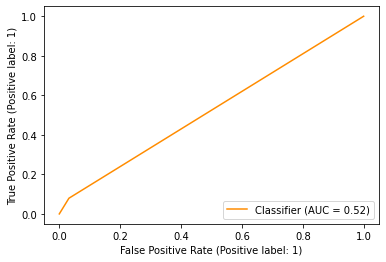

In [ ]:
print(accuracy_score(y_test,y_pred_1))
print(confusion_matrix(y_test, y_pred_1))
print(recall_score(y_test,y_pred_1))
print(precision_score(y_test,y_pred_1))
RocCurveDisplay.from_predictions(y_test, y_pred_1, color= "darkorange")
plt.show()

In this part, we are gonna get the features for our pred_test list which we got by only getting samples from signals without any seizures.

In [ ]:
margin_factor_values = np.zeros((600,2,1))
B_factor_values = np.zeros((600,2,1))
kurtosis_values = np.zeros((600,2,1))
mean_values = np.zeros((600,2,1))
median_values = np.zeros((600,2,1))

abs_max_values = np.zeros((600,2,1))
variance_values = np.zeros((600,2,1))
crest_factor_margin_values = np.zeros((600,2,1))
standard_deviation_values = np.zeros((600,2,1))
RMS_values = np.zeros((600,2,1))

for i in range(0 , 600):
    abs_max_values[i][0][0] = max(pred_test[i][0])
    abs_max_values[i][1][0] = max(pred_test[i][1])
    mean_values[i][0][0] = np.mean(pred_test[i][0])
    mean_values[i][1][0] = np.mean(pred_test[i][1])
    median_values[i][0][0] = np.median(pred_test[i][0])
    median_values[i][1][0] = np.median(pred_test[i][1])
    variance_values[i][0][0] = np.var(pred_test[i][0])
    variance_values[i][1][0] = np.var(pred_test[i][1])
    standard_deviation_values[i][0][0] = np.std(pred_test[i][0])
    standard_deviation_values[i][1][0] = np.std(pred_test[i][0])
    kurtosis_values[i][0][0] = sp.kurtosis(pred_test[i][0])
    kurtosis_values[i][1][0] = sp.kurtosis(pred_test[i][1])
    RMS_values[i][0][0] = np.sqrt(np.mean(pred_test[i][0] ** 2))
    RMS_values[i][1][0] = np.sqrt(np.mean(pred_test[i][1] ** 2))

for i in range (0, 600):
    crest_factor_margin_values[i][0][0] = abs_max_values[i][0][0] / RMS_values[i][0][0]
    crest_factor_margin_values[i][1][0] = abs_max_values[i][1][0] / RMS_values[i][1][0]
    margin_factor_values[i][0][0] = abs_max_values[i][0][0] / variance_values[i][0][0]
    margin_factor_values[i][1][0] = abs_max_values[i][1][0] / variance_values[i][1][0]
    B_factor_values[i][0][0] = (kurtosis_values[i][0][0] * crest_factor_margin_values[i][0][0]) / standard_deviation_values[i][0][0]
    B_factor_values[i][1][0] = (kurtosis_values[i][1][0] * crest_factor_margin_values[i][1][0]) / standard_deviation_values[i][1][0]

abs_max_values = normalize(abs_max_values)
mean_values = normalize(mean_values)
median_values = normalize(median_values)
variance_values = normalize(variance_values)
standard_deviation_values = normalize(standard_deviation_values)
kurtosis_values = normalize(kurtosis_values)
RMS_values = normalize(RMS_values)
crest_factor_margin_values = normalize(crest_factor_margin_values)
margin_factor_values = normalize(margin_factor_values)
B_factor_values = normalize(B_factor_values)

In [ ]:
x_features_pred = np.concatenate((margin_factor_values, kurtosis_values, median_values, B_factor_values, abs_max_values), 1)

In [ ]:
pred_test = np.asarray(pred_test)
x_features_pred = np.asarray(x_features_pred)
x_features_pred = np.transpose(x_features_pred, (0, 2, 1))

We get a model prediction by giving our model full normal data to see how it works by getting false alarms.

In [ ]:
prediction = model.predict([pred_test,x_features_pred])
print(prediction.shape)

19/19 [==============================] - 0s 2ms/step
(600, 1, 2)


In [ ]:
prediction_1 = np.zeros((600,1))
for i in range(0,600):
  if(prediction[i][0][0] > prediction[i][0][1]):
    prediction_1[i][0] = 0
  else:
    prediction_1[i][0] = 1

y_test_pred = np.zeros((600,1))
print(accuracy_score(y_test_pred,prediction_1))

0.8716666666666667


The function below let us find the number of times and duration that our prediction gave us a seizure although it only had normals! we use this method and draw its histogram to get a better grasp of it.

In [ ]:
def find_false_alarm():
  false_alarms = 0
  for i in range(0,600):
    if(0 != prediction_1[i][0]):
      false_alarms = false_alarms + 1

  print("false_alarm count:",false_alarms)
  fls_alm = []
  i = 0
  while(i < 600):
    false_duration = 0
    if(0 != prediction_1[i][0]):
      while(0 != prediction_1[i][0]):
        false_duration = false_duration + 1
        i = i+1
      i = i-1
    if(false_duration > 0):
      fls_alm.append(false_duration * 10)
    i = i+1

  plt.hist(fls_alm,edgecolor = 'black',rwidth = 0.9)
  plt.show()

false_alarm count: 77


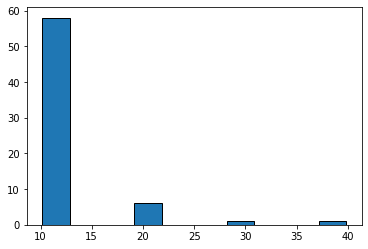

In [ ]:
find_false_alarm()

## A comprehensive solution for building a seizure detection system
One of the main flaws of CNN models is that if our data isn't enough and doesn't have the desired variety it won't be general enough to use on different Patients so one way to fix this is to get samples of many patients as possible so we get many different ways a seizure might occur!

Our structured model which we just achieved and used all our knowledge and any ways we could have thought about on it finally got to 0.87 accuracy and by having enough input samples we won't be needing any other classifiers to mix it with our model, we just need to make our CNN model as precise as we can.

By looking into what we did in this project and what we achieved we can give a piece of professional advice on how to program the implant on the patient, we think the best way to plan it is to have it send the last 20-second signal every 20 seconds, this gives us enough testing time to give to our trained and ready model also it's enough time to inject medicene to our patient if needed.